In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from word2number import w2n
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

In [2]:
df = pd.read_csv('D:/AI Course/CarPrice_Assignment.csv')

In [3]:
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highwaympg.1
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000,22
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000,25
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000,25
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000,25
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000,20
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167,22


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highwaympg.1
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,6.886443
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,16.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,25.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,30.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,34.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,54.000000


In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'highwaympg.1'],
      dtype='object')

In [6]:
df.tail(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highwaympg.1
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0,28
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0,28
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0,28
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0,22
199,200,-1,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,...,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0,22
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,28
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,25
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,23
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,27
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0,25


In [7]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [8]:
try:
    df['cylindernumber'] = df['cylindernumber'].apply(w2n.word_to_num)
except:
    ValueError('Type of input is not string! Please enter a valid number word (eg. two million twenty three thousand and forty nine')
df['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

In [9]:
df['doornumber'] = df['doornumber'].replace({'four':4,'two':2})

C:\Users\m_ibrahim_moh\AppData\Local\Temp\ipykernel_16988\1115713848.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['doornumber'] = df['doornumber'].replace({'four':4,'two':2})


In [10]:
df.groupby('fueltype')['price'].max()

fueltype
diesel    31600.0
gas       45400.0
Name: price, dtype: float64

In [11]:
df.groupby('fueltype')['price'].agg(['min','max','mean','sum','count'])

,min,max,mean,sum,count
fueltype,,,,,
diesel,7099.0,31600.0,15838.1500,316763.000,20
gas,5118.0,45400.0,12999.7982,2404962.667,185


In [12]:
df.groupby(['carbody','fueltype'])['price'].agg(['min','max','mean','sum','count'])

min      max          mean          sum  count
carbody     fueltype                                                    
convertible gas       11595.0  37028.0  21890.500000   131343.000      6
hardtop     diesel    28176.0  28176.0  28176.000000    28176.000      1
            gas        8249.0  45400.0  21356.000000   149492.000      7
hatchback   diesel     7788.0   7788.0   7788.000000     7788.000      1
            gas        5118.0  31400.5  10414.169087   718577.667     69
sedan       diesel     7099.0  31600.0  14774.400000   221616.000     15
            gas        5499.0  41315.0  14264.617284  1155434.000     81
wagon       diesel    13860.0  28248.0  19727.666667    59183.000      3
            gas        6918.0  18950.0  11368.909091   250116.000     22

In [13]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'highwaympg.1'],
      dtype='object')

In [14]:
px.scatter(df,x = 'horsepower', y = 'price',size ="peakrpm",size_max = 10, color ='fueltype' ,hover_name ='carbody')

In [15]:
px.box(df, x = 'price')

In [16]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'highwaympg.1'],
      dtype='object')

In [17]:
df['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [18]:
df['CarName'] = df['CarName'].str.split(expand=True)[0]
df['CarName']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [19]:
df['CarName'].value_counts()

CarName
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [20]:
df['CarName'] = df['CarName'].apply(str.title)

In [21]:
df['CarName'].value_counts()

CarName
Toyota         31
Nissan         18
Mazda          15
Honda          13
Mitsubishi     13
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Volkswagen      9
Bmw             8
Buick           8
Audi            7
Plymouth        7
Saab            6
Isuzu           4
Porsche         4
Alfa-Romero     3
Jaguar          3
Chevrolet       3
Vw              2
Maxda           2
Renault         2
Toyouta         1
Vokswagen       1
Mercury         1
Porcshce        1
Name: count, dtype: int64

In [22]:
df['CarName'] = df['CarName'].replace({'Toyouta':'Toyota' ,'Maxda':'Mazda' , 'Vokswagen':'Volkswagen' , 'Porcshce':'Porsche','Vw':'Volkswagen'})

In [23]:
df['CarName'].value_counts()

CarName
Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Volkswagen     12
Subaru         12
Peugeot        11
Volvo          11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Jaguar          3
Chevrolet       3
Alfa-Romero     3
Renault         2
Mercury         1
Name: count, dtype: int64

In [24]:
Car_price = df.groupby(['CarName'])['price'].agg(['mean','max','min'])

In [25]:
px.bar(Car_price,x = Car_price.index , y = 'min') 

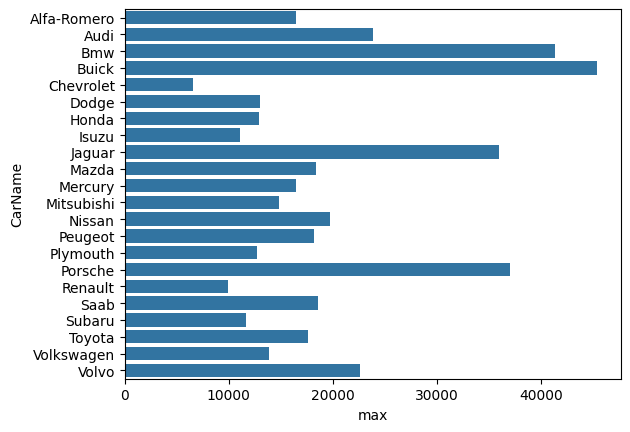

In [26]:
sns.barplot(data = Car_price, x = 'max',y = Car_price.index);

In [27]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highwaympg.1
0,1,3,Alfa-Romero,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,27
1,2,3,Alfa-Romero,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,27
2,3,1,Alfa-Romero,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,26
3,4,2,Audi,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,30
4,5,2,Audi,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,Volvo,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,28
201,202,-1,Volvo,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,25
202,203,-1,Volvo,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,23
203,204,-1,Volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,27


In [28]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [29]:
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [30]:
df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [31]:
df.drop('car_ID',axis=1,inplace=True)

In [32]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highwaympg.1
0,3,Alfa-Romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,27
1,3,Alfa-Romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,27
2,1,Alfa-Romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,26
3,2,Audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,30
4,2,Audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,Volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,28
201,-1,Volvo,gas,turbo,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,25
202,-1,Volvo,gas,std,4,sedan,rwd,front,109.1,188.8,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,23
203,-1,Volvo,diesel,turbo,4,sedan,rwd,front,109.1,188.8,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,27


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [34]:
Encoder = LabelEncoder()
CarName_taransform =Encoder.fit_transform(df['CarName'])
df['CarName'] = CarName_taransform

In [35]:
fueltype_taransform =Encoder.fit_transform(df['fueltype'])
df['fueltype'] = fueltype_taransform

In [36]:
aspiration_taransform =Encoder.fit_transform(df['aspiration'])
df['aspiration'] = aspiration_taransform

In [37]:
carbody_taransform =Encoder.fit_transform(df['carbody'])
df['carbody'] = carbody_taransform

In [38]:
df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [39]:
df['drivewheel'] = df['drivewheel'].str.replace('4wd','fwd')

In [40]:
drivewheel_taransform =Encoder.fit_transform(df['drivewheel'])
df['drivewheel'] = drivewheel_taransform

In [41]:
enginelocation_taransform =Encoder.fit_transform(df['enginelocation'])
df['enginelocation'] = enginelocation_taransform
enginetype_taransform =Encoder.fit_transform(df['enginetype'])
df['enginetype'] = enginetype_taransform
fuelsystem_taransform =Encoder.fit_transform(df['fuelsystem'])
df['fuelsystem'] = fuelsystem_taransform



In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    int32  
 2   fueltype          205 non-null    int32  
 3   aspiration        205 non-null    int32  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    int32  
 6   drivewheel        205 non-null    int32  
 7   enginelocation    205 non-null    int32  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int32  
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int32  
 1

In [43]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highwaympg.1
0,3,0,1,0,2,0,1,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,13495.0,27
1,3,0,1,0,2,0,1,0,88.6,168.8,...,5,3.47,2.68,9.0,111,5000,21,27,16500.0,27
2,1,0,1,0,2,2,1,0,94.5,171.2,...,5,2.68,3.47,9.0,154,5000,19,26,16500.0,26
3,2,1,1,0,4,3,0,0,99.8,176.6,...,5,3.19,3.40,10.0,102,5500,24,30,13950.0,30
4,2,1,1,0,4,3,0,0,99.4,176.6,...,5,3.19,3.40,8.0,115,5500,18,22,17450.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,21,1,0,4,3,1,0,109.1,188.8,...,5,3.78,3.15,9.5,114,5400,23,28,16845.0,28
201,-1,21,1,1,4,3,1,0,109.1,188.8,...,5,3.78,3.15,8.7,160,5300,19,25,19045.0,25
202,-1,21,1,0,4,3,1,0,109.1,188.8,...,5,3.58,2.87,8.8,134,5500,18,23,21485.0,23
203,-1,21,0,1,4,3,1,0,109.1,188.8,...,3,3.01,3.40,23.0,106,4800,26,27,22470.0,27


In [44]:
df.corr()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,highwaympg.1
symboling,1.000000,-0.092793,0.194311,-0.059866,-0.664073,-0.596135,-0.076381,0.212471,-0.531954,-0.357612,...,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,0.034606
CarName,-0.092793,1.000000,-0.055049,0.011326,0.150465,0.101473,-0.032530,0.054410,-0.013288,0.030733,...,0.104030,0.191301,-0.210031,0.088972,-0.109686,-0.151830,0.108458,0.119023,-0.262234,0.119023
fueltype,0.194311,-0.055049,1.000000,-0.401397,-0.191491,-0.147853,-0.122035,0.040070,-0.308346,-0.212679,...,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679,-0.191392
aspiration,-0.059866,0.011326,-0.401397,1.000000,0.031792,0.063028,0.112470,-0.057191,0.257611,0.234539,...,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926,-0.254416
doornumber,-0.664073,0.150465,-0.191491,0.031792,1.000000,0.680358,-0.073958,-0.137757,0.447357,0.398568,...,-0.015519,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835,-0.036330
carbody,-0.596135,0.101473,-0.147853,0.063028,0.680358,1.000000,-0.114457,-0.277009,0.401362,0.334433,...,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976,-0.007170
drivewheel,-0.076381,-0.032530,-0.122035,0.112470,-0.073958,-0.114457,1.000000,0.158772,0.498830,0.538370,...,0.466289,0.574105,-0.022325,0.105185,0.575564,-0.086159,-0.545789,-0.566149,0.638957,-0.566149
enginelocation,0.212471,0.054410,0.040070,-0.057191,-0.137757,-0.277009,0.158772,1.000000,-0.187790,-0.050989,...,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973,-0.102026
wheelbase,-0.531954,-0.013288,-0.308346,0.257611,0.447357,0.401362,0.498830,-0.187790,1.000000,0.874587,...,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.544082
carlength,-0.357612,0.030733,-0.212679,0.234539,0.398568,0.334433,0.538370,-0.050989,0.874587,1.000000,...,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,-0.704662


In [45]:
y = df['price']
x = df.drop('price',axis = 1)
x_train,x_test , y_train,y_test =  train_test_split(x,y,train_size= 0.8,random_state=42)
xtrain,x_val,y_val,ytrain =train_test_split(x_train,y_train,train_size= 0.5,random_state=42)

In [46]:
Car_Price_estmitor_model = LinearRegression()
Car_Price_estmitor_model.fit(xtrain,ytrain)

LinearRegression()

In [47]:
y_pred1 = Car_Price_estmitor_model.predict(xtrain)
y_pred1

array([13037.93742723, 14013.79497501, 13685.93783717, 10767.0357697 ,
        8854.95474835, 10585.97067313,  8481.78365116, 19305.41789469,
       11144.02146493, 11582.23113059,  6950.28840688, 19160.49275253,
       14958.79944831, 13436.1260248 ,  8481.78365116, 25245.68366027,
       18019.29571574, 10197.45268332, 11670.6900829 , 14191.8666744 ,
       11270.04698299,  5640.10342577, 13805.28736302,  6933.46165869,
       10952.70036933, 16475.16467315, 11378.49521135, 15110.71032023,
       15918.10467547, 13805.28736302, 11357.05172578,  6665.14838865,
       21220.18024667, 13359.72453652, 13779.15299601, 14809.07182104,
       14599.05466708, 11268.40188992, 15270.88369643, 19487.71741049,
       12820.94269106, 16338.08948068, 16267.00061195, 12629.59600286,
       11659.39182294, 16724.46440836,  8802.93269769, 11871.05943642,
       10926.15456623, 11717.52579134, 10091.22640661, 12202.10280196,
       18021.46882405, 15738.87348213, 12785.80883209, 16652.92573479,
      

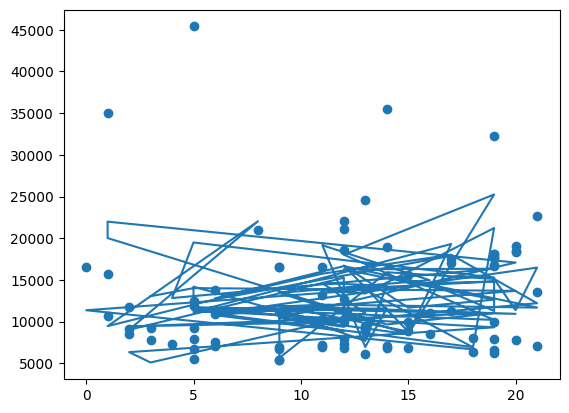

In [48]:
plt.scatter(xtrain['CarName'],ytrain);
plt.plot(xtrain['CarName'],y_pred1);

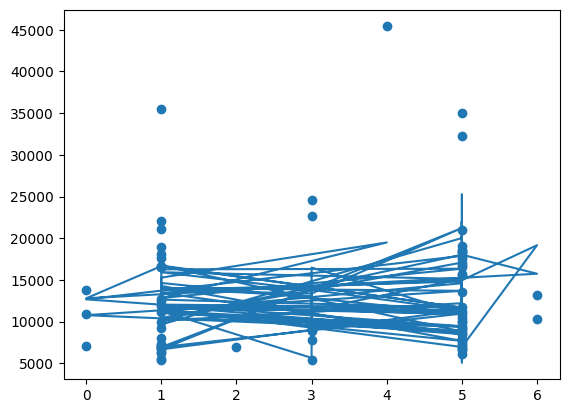

In [49]:
plt.scatter(xtrain['fuelsystem'],ytrain);
plt.plot(xtrain['fuelsystem'],y_pred1);

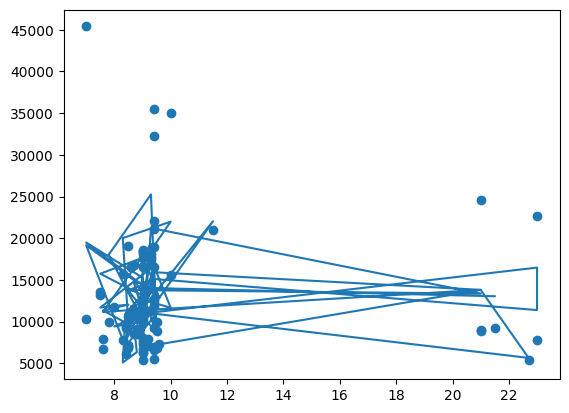

In [50]:
plt.scatter(xtrain['compressionratio'],ytrain);
plt.plot(xtrain['compressionratio'],y_pred1);

In [51]:
E1 = mean_squared_error(ytrain,y_pred1)
E1

38728134.04160728

In [52]:
np.sqrt(E1)

6223.1932351171035

In [116]:
Car_Price_estmitor_model1 =Lasso(alpha=3000)
Car_Price_estmitor_model1.fit(xtrain,ytrain)

Lasso(alpha=3000)

In [117]:
y_pred2 = Car_Price_estmitor_model1.predict(xtrain)

In [118]:
E = mean_squared_error(ytrain,y_pred2)

In [119]:
E_ = np.sqrt(E)

In [120]:
E

54385978.244507775

In [121]:
E_

7374.68495900047

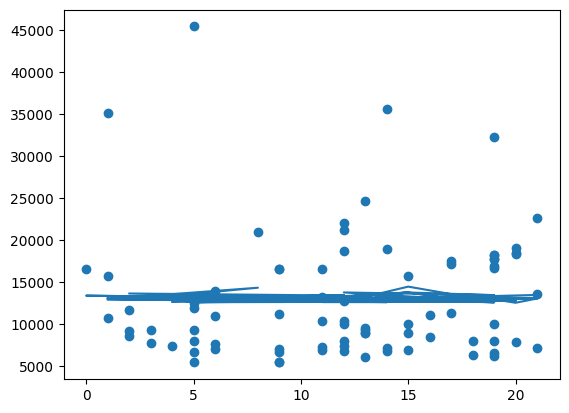

In [122]:
plt.scatter(xtrain['CarName'],ytrain);
plt.plot(xtrain['CarName'],y_pred2);

In [123]:
xtrain.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'highwaympg.1'],
      dtype='object')

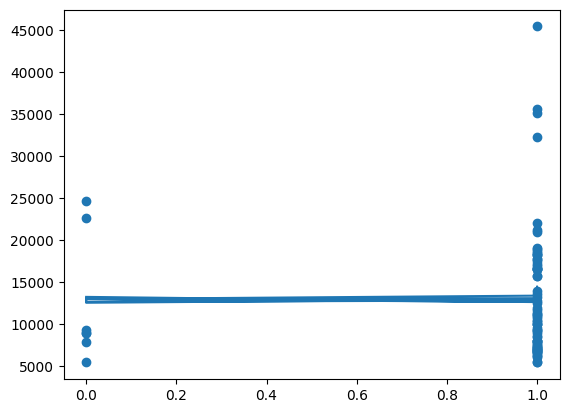

In [124]:
plt.scatter(xtrain['fueltype'],ytrain);
plt.plot(xtrain['fueltype'],y_pred2);

In [125]:
Car_Price_estmitor_model1 =Lasso(alpha=3000)
Car_Price_estmitor_model1.fit(x_val,y_val)

Lasso(alpha=3000)

In [126]:
y_pred_3 = Car_Price_estmitor_model1.predict(x_val)

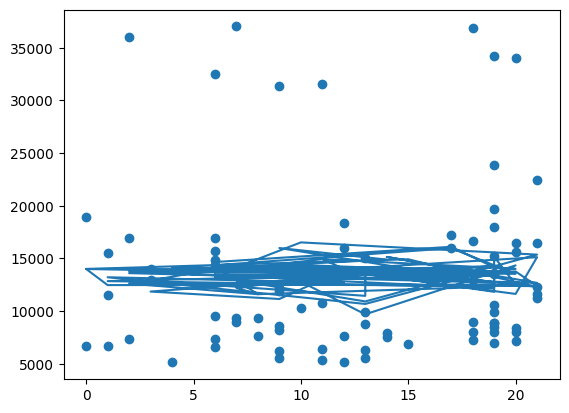

In [127]:
plt.scatter(x_val['CarName'],y_val)
plt.plot(x_val['CarName'],y_pred_3);

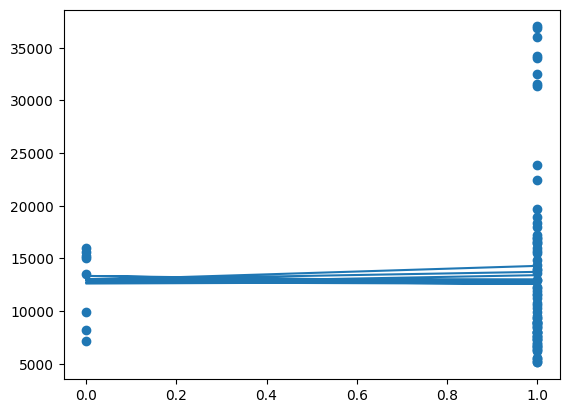

In [136]:
plt.scatter(x_val['fueltype'],y_val)
plt.plot(x_val['fueltype'],y_pred2);

In [128]:
E3 = mean_squared_error(y_val,y_pred_3)
E3

62544649.36498914

In [129]:
np.sqrt(E3)

7908.517520053246

In [130]:
Car_Price_estmitor_model2 =Lasso(alpha=3000)
Car_Price_estmitor_model2.fit(x_test,y_test)

Lasso(alpha=3000)

In [131]:
y_pred_4 = Car_Price_estmitor_model1.predict(x_test)

In [132]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'highwaympg.1'],
      dtype='object')

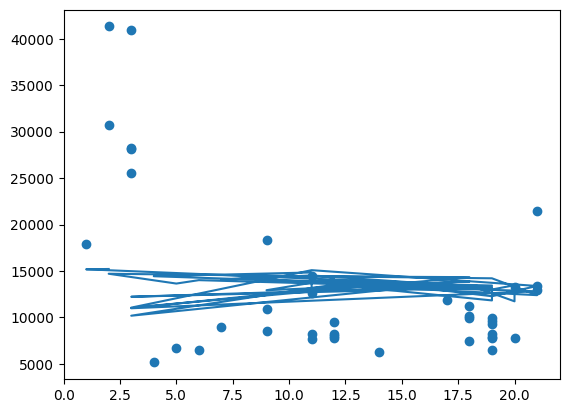

In [133]:
plt.scatter(x_test['CarName'],y_test)
plt.plot(x_test['CarName'],y_pred_4);

In [134]:
E4 = mean_squared_error(y_test,y_pred_4)
E4

83970624.24220276

In [135]:
np.sqrt(E4)

9163.548670804492